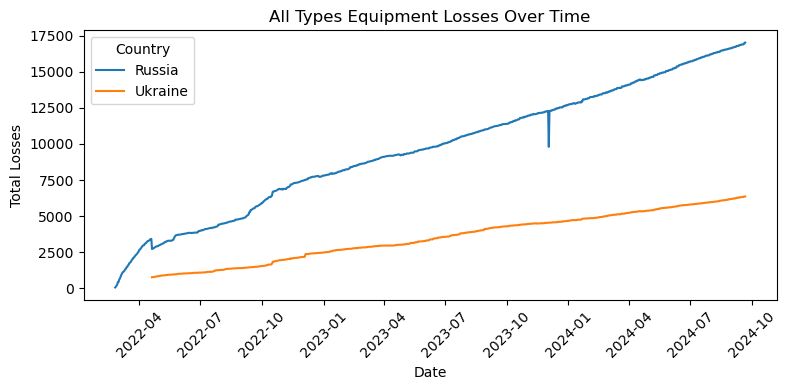

           date  country origin equipment_type  destroyed  abandoned  \
0    2023-05-18   Russia    NaN      All Types     6085.0      253.0   
355  2024-03-07  Ukraine    NaN      All Types     3514.0       88.0   
743  2023-03-24   Russia    NaN      All Types     5606.0      250.0   
1091 2023-07-13  Ukraine    NaN      All Types     2426.0       68.0   
1423 2024-03-09   Russia    NaN      All Types     9502.0      365.0   

      captured  damaged  type_total  
0       2480.0    668.0      9486.0  
355      886.0    603.0      5091.0  
743     2484.0    617.0      8957.0  
1091     826.0    372.0      3692.0  
1423    2597.0   1265.0     13729.0  


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from datetime import datetime
from scipy import stats

df = pd.read_csv('../data/combined_totals.csv')
# sample = df.sample(100)
# sample.to_csv('outputfiles/sample.csv', index=False)

def clean_equipment_type(equipment):
    return re.sub(r'^\d+\s+', '', equipment)

df['equipment_type'] = df['equipment_type'].apply(clean_equipment_type)

df['date'] = pd.to_datetime(df['date'])

# Filter for 'All Types' data
all_types_df = df[(df['equipment_type'] == 'All Types')]

# Create a line plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=all_types_df, x='date', y='type_total', hue='country')

plt.title('All Types Equipment Losses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.tight_layout()
plt.savefig('../plots/all_types_over_time.png')
plt.show()

print(all_types_df.head())

# countries = all_types_df['country'].unique()

# fig, axes = plt.subplots(len(countries), 1, figsize=(12, 6*len(countries)), sharex=True)
# fig.suptitle('All Types Equipment Losses Over Time by Country')

# for i, country in enumerate(countries):
#     country_data = all_types_df[all_types_df['country'] == country]
#     sns.lineplot(data=country_data, x='date', y='type_total', ax=axes[i])
#     axes[i].set_title(f'{country}')
#     axes[i].set_xlabel('Date')
#     axes[i].set_ylabel('Total Losses')
#     axes[i].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()

# TODO: Need to remove one of the data points form russia data. Some kind of error

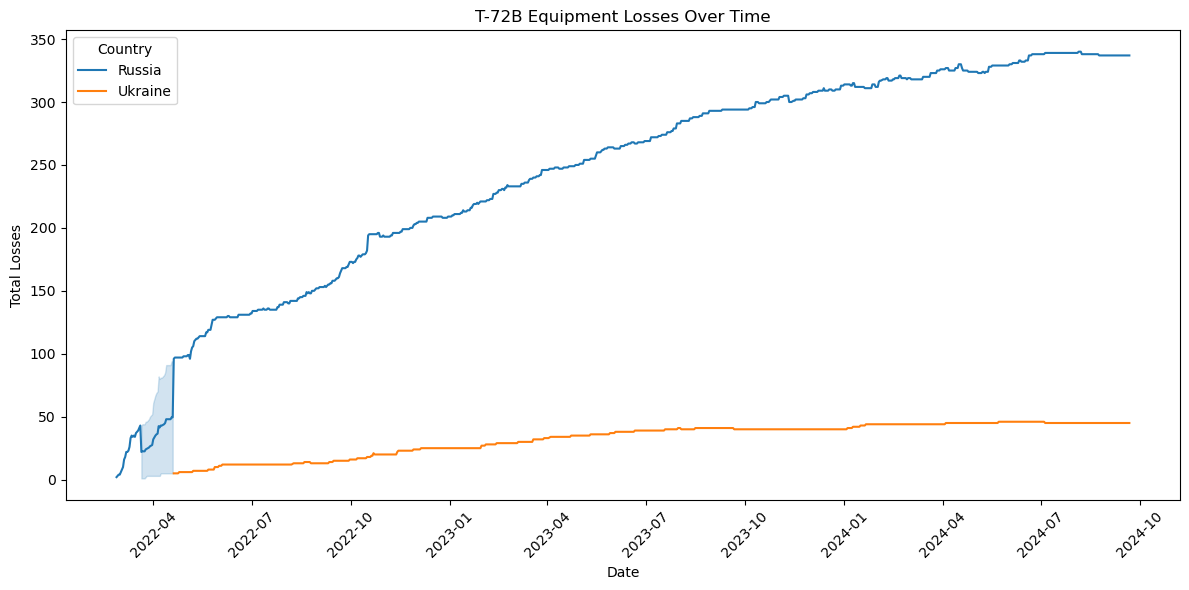

           date  country                 origin equipment_type  destroyed  \
301  2023-05-18   Russia  23px-Soviet Union.svg          T-72B      166.0   
568  2024-03-07  Ukraine  23px-Soviet Union.svg          T-72B       36.0   
1038 2023-03-24   Russia  23px-Soviet Union.svg          T-72B      153.0   
1275 2023-07-13  Ukraine  23px-Soviet Union.svg          T-72B       29.0   
1839 2024-03-09   Russia  23px-Soviet Union.svg          T-72B      218.0   

      abandoned  captured  damaged  type_total  
301        10.0      65.0     19.0       260.0  
568         0.0       5.0      3.0        44.0  
1038        5.0      65.0     18.0       241.0  
1275        0.0       7.0      3.0        39.0  
1839       15.0      62.0     23.0       318.0  


In [4]:
def filter_equipment(df, equipment_pattern):
    return df[df['equipment_type'].str.contains(equipment_pattern, regex=True, na=False)]

# equipment_type = 'T-90M'
# equipment_type = 'T-72BA'
equipment_type = 'T-72B'

# pattern = r'^\d*\s*' + re.escape(equipment_type)
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
pattern = r'^\d*\s*' + re.escape(equipment_type) + r'$'

filtered_df = filter_equipment(df, pattern)

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='type_total', hue='country')

plt.title(f'{equipment_type} Equipment Losses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.tight_layout()
plt.savefig(f'../plots/{equipment_type}_losses.png')
plt.show()

print(filtered_df.head())

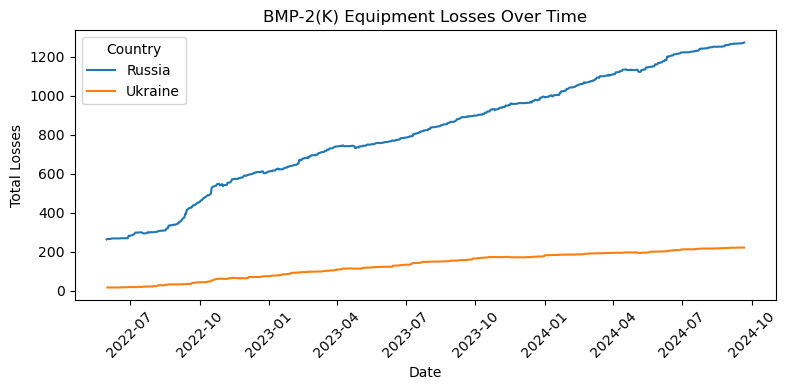

           date  country                 origin equipment_type  destroyed  \
349  2023-05-18   Russia  23px-Soviet Union.svg       BMP-2(K)      475.0   
479  2024-03-07  Ukraine  23px-Soviet Union.svg       BMP-2(K)      152.0   
1083 2023-03-24   Russia  23px-Soviet Union.svg       BMP-2(K)      454.0   
1185 2023-07-13  Ukraine  23px-Soviet Union.svg       BMP-2(K)      109.0   
1750 2024-03-09   Russia  23px-Soviet Union.svg       BMP-2(K)      737.0   

      abandoned  captured  damaged  type_total  
349        27.0     196.0     54.0       752.0  
479         6.0      23.0     10.0       191.0  
1083       25.0     198.0     53.0       730.0  
1185        5.0      23.0      5.0       142.0  
1750       39.0     206.0    105.0      1087.0  


In [9]:
def filter_equipment(df, equipment_pattern):
    return df[df['equipment_type'].str.contains(equipment_pattern, regex=True, na=False)]

# equipment_type = 'T-90M'
# equipment_type = 'T-72BA'
equipment_type = 'BMP-2(K)'

# pattern = r'^\d*\s*' + re.escape(equipment_type)
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
pattern = r'^\d*\s*' + re.escape(equipment_type) + r'$'

filtered_df = filter_equipment(df, pattern)

plt.figure(figsize=(8, 4))
sns.lineplot(data=filtered_df, x='date', y='type_total', hue='country')

plt.title(f'{equipment_type} Equipment Losses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.tight_layout()
plt.savefig(f'../plots/{equipment_type}_losses.png')
plt.show()

print(filtered_df.head())

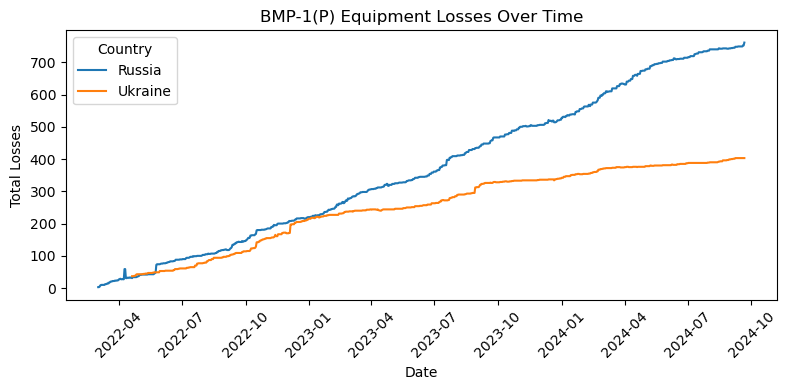

           date  country                 origin equipment_type  destroyed  \
326  2023-05-18   Russia  23px-Soviet Union.svg       BMP-1(P)      200.0   
554  2024-03-07  Ukraine  23px-Soviet Union.svg       BMP-1(P)      289.0   
1061 2023-03-24   Russia  23px-Soviet Union.svg       BMP-1(P)      170.0   
1238 2023-07-13  Ukraine  23px-Soviet Union.svg       BMP-1(P)      200.0   
1876 2024-03-09   Russia  23px-Soviet Union.svg       BMP-1(P)      428.0   

      abandoned  captured  damaged  type_total  
326         8.0      84.0     36.0       328.0  
554        15.0      45.0     23.0       372.0  
1061       10.0      87.0     31.0       298.0  
1238       16.0      43.0     14.0       273.0  
1876       21.0      84.0     76.0       609.0  


In [10]:
def filter_equipment(df, equipment_pattern):
    return df[df['equipment_type'].str.contains(equipment_pattern, regex=True, na=False)]

# equipment_type = 'T-90M'
# equipment_type = 'T-72BA'
equipment_type = 'BMP-1(P)'

# pattern = r'^\d*\s*' + re.escape(equipment_type)
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
# pattern = r'^\d*\s*' + re.escape(equipment_type) + r'($|\s)'
pattern = r'^\d*\s*' + re.escape(equipment_type) + r'$'

filtered_df = filter_equipment(df, pattern)

plt.figure(figsize=(8, 4))
sns.lineplot(data=filtered_df, x='date', y='type_total', hue='country')

plt.title(f'{equipment_type} Equipment Losses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Losses')
plt.xticks(rotation=45)
plt.legend(title='Country')

plt.tight_layout()
plt.savefig(f'../plots/{equipment_type}_losses.png')
plt.show()

print(filtered_df.head())

In [57]:
# Get unique equipment types for each country
ukraine_equipment = set(df[df['country'] == 'Ukraine']['equipment_type'])
russia_equipment = set(df[df['country'] == 'Russia']['equipment_type'])

# Find shared equipment
shared_equipment = ukraine_equipment.intersection(russia_equipment)

# Function to get the latest data for a specific equipment type
def get_latest_data(equipment_type):
    equipment_data = df[df['equipment_type'] == equipment_type]
    latest_date = equipment_data['date'].max()
    return equipment_data[equipment_data['date'] == latest_date].iloc[0]

heavily_destroyed_equipment = {}

for equipment in shared_equipment:
    latest_data = get_latest_data(equipment)
    if latest_data['destroyed'] > 100:
        heavily_destroyed_equipment[equipment] = latest_data['destroyed']

for equipment, destroyed_count in sorted(heavily_destroyed_equipment.items(), key=lambda x: x[1], reverse=True):
    print(f"- {equipment}: {destroyed_count} destroyed")
    
# This is shared equipment with more than 100 destroyed instances for Russia, Ukraine will have had fewer losses for some of these

- All Types: 12370.0 destroyed
- BMP-2(K): 916.0 destroyed
- Ural-4320: 767.0 destroyed
- KamAZ 6x6: 756.0 destroyed
- MT-LB: 715.0 destroyed
- BMP-1(P): 563.0 destroyed
- T-80BV: 416.0 destroyed
- Unknown tank: 327.0 destroyed
- T-72B: 236.0 destroyed
- BMD-2: 209.0 destroyed
- Unknown AFV: 196.0 destroyed
- Unknown BMP-1/2: 177.0 destroyed
- 122mm BM-21 Grad: 162.0 destroyed
- 152mm 2S19 Msta-S: 153.0 destroyed
- BTR-80: 150.0 destroyed
- 122mm 2S1 Gvozdika: 112.0 destroyed
- Unknown T-72: 110.0 destroyed
- KamAZ 6x6 tanker: 103.0 destroyed


In [58]:
def get_latest_data(equipment_type, country):
    equipment_data = df[(df['equipment_type'] == equipment_type) & (df['country'] == country)]
    if equipment_data.empty:
        return None
    # Only examine the latest entry, it already contains the total
    latest_date = equipment_data['date'].max()
    return equipment_data[equipment_data['date'] == latest_date].iloc[0]

def analyze_country_losses(country):
    country_data = df[df['country'] == country]
    heavily_destroyed_equipment = {}

    for equipment in country_data['equipment_type'].unique():
        latest_data = get_latest_data(equipment, country)
        if latest_data is not None and latest_data['destroyed'] > 100:
            heavily_destroyed_equipment[equipment] = latest_data['destroyed']

    print(f"\nEquipment with more than 100 instances destroyed for {country}:")
    for equipment, destroyed_count in sorted(heavily_destroyed_equipment.items(), key=lambda x: x[1], reverse=True):
        print(f"- {equipment}: {destroyed_count} destroyed")

    for equipment in heavily_destroyed_equipment:
        latest_data = get_latest_data(equipment, country)
        print(f"\n{equipment}:")
        print(f"  Total destroyed: {heavily_destroyed_equipment[equipment]}")
        print(f"  Latest date: {latest_data['date']}")
        print(f"  Destroyed: {latest_data['destroyed']}")
        print(f"  Captured: {latest_data['captured']}")
        print(f"  Abandoned: {latest_data['abandoned']}")
        print(f"  Damaged: {latest_data['damaged']}")

analyze_country_losses('Ukraine')
analyze_country_losses('Russia')


Equipment with more than 100 instances destroyed for Ukraine:
- All Types: 4525.0 destroyed
- BMP-1(P): 315.0 destroyed
- T-64BV: 218.0 destroyed
- BMP-2(K): 177.0 destroyed
- ZiL-131: 115.0 destroyed
- GAZ-66: 107.0 destroyed
- 122mm 2S1 Gvozdika: 105.0 destroyed

All Types:
  Total destroyed: 4525.0
  Latest date: 2024-09-21 00:00:00
  Destroyed: 4525.0
  Captured: 970.0
  Abandoned: 96.0
  Damaged: 774.0

122mm 2S1 Gvozdika:
  Total destroyed: 105.0
  Latest date: 2024-09-21 00:00:00
  Destroyed: 105.0
  Captured: 12.0
  Abandoned: 0.0
  Damaged: 16.0

GAZ-66:
  Total destroyed: 107.0
  Latest date: 2024-09-21 00:00:00
  Destroyed: 107.0
  Captured: 26.0
  Abandoned: 1.0
  Damaged: 5.0

ZiL-131:
  Total destroyed: 115.0
  Latest date: 2024-09-21 00:00:00
  Destroyed: 115.0
  Captured: 37.0
  Abandoned: 1.0
  Damaged: 7.0

BMP-2(K):
  Total destroyed: 177.0
  Latest date: 2024-09-21 00:00:00
  Destroyed: 177.0
  Captured: 26.0
  Abandoned: 6.0
  Damaged: 12.0

T-64BV:
  Total destro

In [59]:
# Sourced from IISS Military Balance 2021
bmp_stocks_2021  = {
    'Country': ['Ukraine', 'Ukraine', 'Russia', 'Russia'],
    'Vehicle': ['BMP-1(P)', 'BMP-2(K)', 'BMP-1(P)', 'BMP-2(K)'],
    'Count': [213, 890, 450, 2900]
}

bmp_stocks_2021 = pd.DataFrame(bmp_stocks_2021)
bmp_stocks_2021

,Country,Vehicle,Count
0,Ukraine,BMP-1(P),213
1,Ukraine,BMP-2(K),890
2,Russia,BMP-1(P),450
3,Russia,BMP-2(K),2900


In [60]:
# Sourced from Oryx
bmp_data_2024 = {
    'Country': ['Ukraine', 'Ukraine', 'Russia', 'Russia'],
    'Vehicle': ['BMP-2(K)', 'BMP-1(P)', 'BMP-2(K)', 'BMP-1(P)'],
    'Destroyed': [177.0, 315.0, 916.0, 563.0],
    'Captured': [26.0, 47.0, 200.0, 85.0],
    'Abandoned': [6.0, 16.0, 39.0, 22.0],
    'Damaged': [12.0, 25.0, 119.0, 91.0]
}

bmp_data_2024 = pd.DataFrame(bmp_data_2024)
bmp_data_2024['Total Losses'] = bmp_data_2024['Destroyed'] + bmp_data_2024['Captured'] + bmp_data_2024['Abandoned'] + bmp_data_2024['Damaged']
bmp_data_2024

,Country,Vehicle,Destroyed,Captured,Abandoned,Damaged,Total Losses
0,Ukraine,BMP-2(K),177.0,26.0,6.0,12.0,221.0
1,Ukraine,BMP-1(P),315.0,47.0,16.0,25.0,403.0
2,Russia,BMP-2(K),916.0,200.0,39.0,119.0,1274.0
3,Russia,BMP-1(P),563.0,85.0,22.0,91.0,761.0


In [61]:
df_merged = pd.merge(bmp_stocks_2021, bmp_data_2024, on=['Country', 'Vehicle'], how='outer')

# Calculate the loss percentage
df_merged['Loss Percentage'] = df_merged['Total Losses'] / df_merged['Count'] * 100
print(df_merged)


   Country   Vehicle  Count  Destroyed  Captured  Abandoned  Damaged  \
0   Russia  BMP-1(P)    450      563.0      85.0       22.0     91.0   
1   Russia  BMP-2(K)   2900      916.0     200.0       39.0    119.0   
2  Ukraine  BMP-1(P)    213      315.0      47.0       16.0     25.0   
3  Ukraine  BMP-2(K)    890      177.0      26.0        6.0     12.0   

   Total Losses  Loss Percentage  
0         761.0       169.111111  
1        1274.0        43.931034  
2         403.0       189.201878  
3         221.0        24.831461  


In [62]:
# Separate data for BMP-1 and BMP-2
bmp1_data = df_merged[df_merged['Vehicle'] == 'BMP-1(P)']['Loss Percentage']
bmp2_data = df_merged[df_merged['Vehicle'] == 'BMP-2(K)']['Loss Percentage']

In [63]:
# Function to perform t-test and print results
def perform_ttest(group1, group2, label1, label2):
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"\nComparison: {label1} vs {label2}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference in losses between {label1} and {label2} is statistically significant.")
    else:
        print(f"The difference in losses between {label1} and {label2} is not statistically significant.")
    print(f"Mean loss percentage for {label1}: {group1.mean():.2f}%")
    print(f"Mean loss percentage for {label2}: {group2.mean():.2f}%")

# Compare BMP-1(P) vs BMP-2(K) (overall)
bmp1p_data = df_merged[df_merged['Vehicle'] == 'BMP-1(P)']['Loss Percentage']
bmp2k_data = df_merged[df_merged['Vehicle'] == 'BMP-2(K)']['Loss Percentage']
perform_ttest(bmp1p_data, bmp2k_data, 'BMP-1(P)', 'BMP-2(K)')

# Compare Ukraine vs Russia (overall)
ukraine_data = df_merged[df_merged['Country'] == 'Ukraine']['Loss Percentage']
russia_data = df_merged[df_merged['Country'] == 'Russia']['Loss Percentage']
perform_ttest(ukraine_data, russia_data, 'Ukraine', 'Russia')

print("\nLoss percentages by country and vehicle type:")
for _, row in df_merged.iterrows():
    print(f"{row['Country']} {row['Vehicle']}: {row['Loss Percentage']:.2f}%")


Comparison: BMP-1(P) vs BMP-2(K)
T-statistic: 10.4453118522016
P-value: 0.009041405826271156
The difference in losses between BMP-1(P) and BMP-2(K) is statistically significant.
Mean loss percentage for BMP-1(P): 179.16%
Mean loss percentage for BMP-2(K): 34.38%

Comparison: Ukraine vs Russia
T-statistic: 0.00479741101295102
P-value: 0.9966077376589059
The difference in losses between Ukraine and Russia is not statistically significant.
Mean loss percentage for Ukraine: 107.02%
Mean loss percentage for Russia: 106.52%

Loss percentages by country and vehicle type:
Russia BMP-1(P): 169.11%
Russia BMP-2(K): 43.93%
Ukraine BMP-1(P): 189.20%
Ukraine BMP-2(K): 24.83%
